<a href="https://colab.research.google.com/github/Muskanyada/Spam-Mail-Prediction-using-Machine-Learning/blob/main/Spam_Mail_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
# here Tfidfvectoriser is used to convert text data into numerical data

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# accuarcy score is used to evaluate our model and how well our model is performing

Data collection and preprocessing

In [56]:
raw_mail_data = pd.read_csv('/content/mail_data.csv')


In [57]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [58]:
#replace null values with null string
mail_data= raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [59]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
#checking the number of rows and column in dataframe

mail_data.shape

(5572, 2)

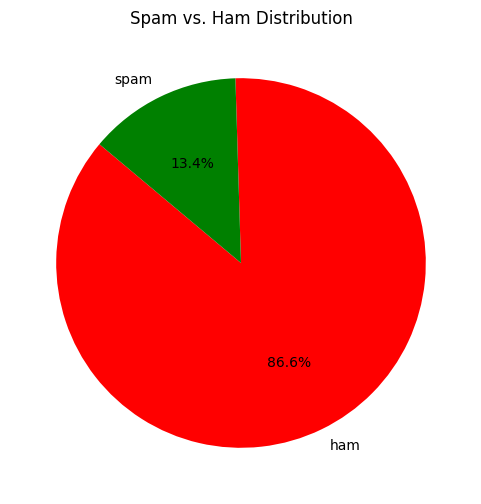

In [61]:
plt.figure(figsize=(6, 6))
raw_mail_data["Category"].value_counts().plot.pie(autopct="%1.1f%%", colors=["red", "green"], startangle=140)
plt.title("Spam vs. Ham Distribution")
plt.ylabel("")
plt.show()

Label Encoding

In [75]:
#label spam mail as 0 ; ham(not spam) as 1

mail_data.loc[mail_data['Category']=='spam', 'category',]=0
mail_data.loc[mail_data['Category']=='ham', 'category',]=1

spam -0

ham -1


In [76]:
#separting the data as texts and labels

X= mail_data['Message']

Y=mail_data['category']

In [77]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [78]:
print(Y)

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: category, Length: 5572, dtype: float64


splitting the data into training and test data

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=3)

In [80]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [81]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [82]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [83]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

In [84]:
print(X_train_features.shape, X_test_features.shape, Y_train.shape, Y_test.shape)


(4457, 7431) (1115, 7431) (4457,) (1115,)


training the model

Logistic model

In [85]:
model = LogisticRegression()

In [86]:
#training the logistic regression model with the training data
model.fit(X_train_features, Y_train)


LogisticRegression()

Evaluating the trained data

In [87]:
#predicting on training data


prediction_on_training_data= model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data)

In [88]:
print("Accuracy on training data:", accuracy_on_training_data)

Accuracy on training data: 0.9676912721561588


In [89]:
#predicting on test data

prediction_on_test_data= model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [90]:
print("Accuracy on test data:", accuracy_on_test_data)

Accuracy on test data: 0.9668161434977578


Random Forest Algorithm


In [91]:
vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(mail_data['Message'])

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, mail_data['category'], test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(Y_test, rf_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 98.30%


In [92]:
# Initialize Naïve Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, Y_train)

# Predict on the test set
nb_pred = nb_model.predict(X_test)

# Evaluate model performance
nb_accuracy = accuracy_score(Y_test, nb_pred)
nb_classification_report = classification_report(Y_test, nb_pred)
nb_confusion_matrix = confusion_matrix(Y_test, nb_pred)

# Print results
print(f"Naïve Bayes Accuracy: {nb_accuracy * 100:.2f}%")
print("\nClassification Report:\n", nb_classification_report)
print("\nConfusion Matrix:\n", nb_confusion_matrix)

Naïve Bayes Accuracy: 96.50%

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.74      0.85       149
         1.0       0.96      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115


Confusion Matrix:
 [[110  39]
 [  0 966]]


Building a Predictive system

In [ ]:
input_mail=["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]

#convert text to feature vectors
input_data_features= feature_extraction.transform(input_mail)

#making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham Mail')

else:
  print('Spam Mail')

[1]
Ham Mail
